In [56]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [57]:
# f=pd.concat([pd.read_csv('Data_mar.csv',low_memory=False),pd.read_csv('Data_jan.csv',low_memory=False),pd.read_csv('Data_feb.csv',low_memory=False)])
f=pd.read_csv('postpaid_churn_prediction_m202209_forward_1.csv')
retest=pd.read_csv('postpaid_churn_prediction_m202209_forward_1.csv')
# f=f.fillna('NULL')
# test=pd.read_csv('postpaid_churn_pred_202211_1.csv')
retest2=pd.read_csv('postpaid_churn_prediction_m202209_1.csv')

In [58]:
test = pd.merge(retest.iloc[:,:-1], retest2[["user_id",'是否离网']], how="inner", on=["user_id"])
f = pd.merge(retest.iloc[:,:-1], retest2[["user_id",'是否离网']], how="inner", on=["user_id"])

In [59]:
len(test[test['是否离网']=='Y'])/len(test)

0.1773901347753287

In [60]:
len(test[test['是否离网']=='Y'])

12925

In [61]:
len(test[test['是否离网']=='Y']),len(test)

(12925, 72862)

In [62]:
N_0_count=[]
N_0_Tot=0
temp=(f[f['是否离网']=='N']).drop(['是否离网'],axis=1)
for x in temp.columns:
        N_0_Tot+=len(temp[temp[x]=='N'])
        N_0_count.append([x,len(temp[temp[x]=='N'])])

In [63]:
Y_0_count=[]
Y_0_Tot=0
temp=(f[f['是否离网']=='Y']).drop(['是否离网'],axis=1)
for x in temp.columns:
        Y_0_Tot+=len(temp[temp[x]=='N'])
        Y_0_count.append([x,len(temp[temp[x]=='N'])])

In [64]:
Y_0_df=pd.DataFrame(Y_0_count).set_index(0).sort_index()
N_0_df=pd.DataFrame(N_0_count).set_index(0).sort_index()

(<AxesSubplot: xlabel='0'>, <AxesSubplot: xlabel='0'>)

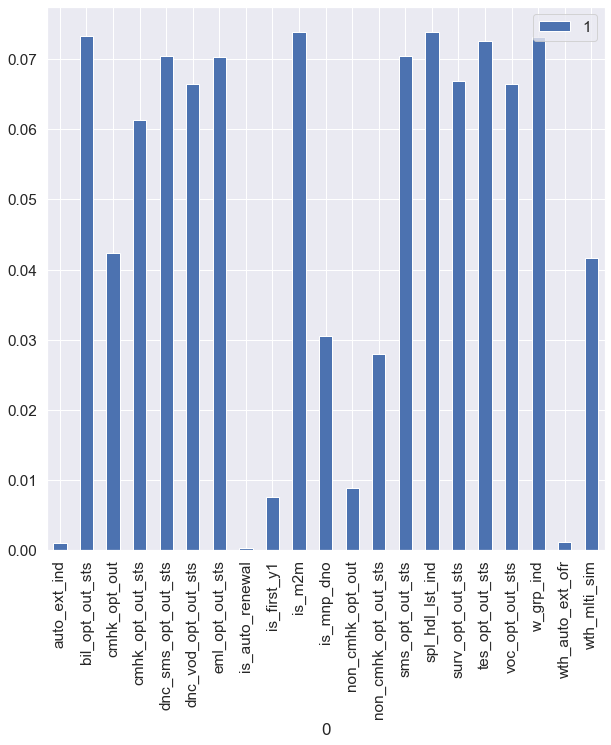

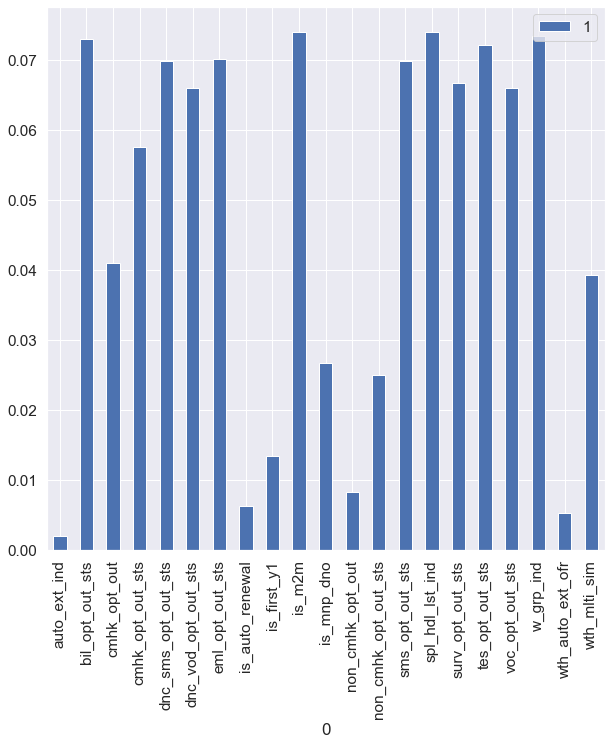

In [65]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df[N_0_df[1]!=0]/N_0_Tot).plot.bar(), (Y_0_df[Y_0_df[1]!=0]/Y_0_Tot).plot.bar()

<AxesSubplot: xlabel='0'>

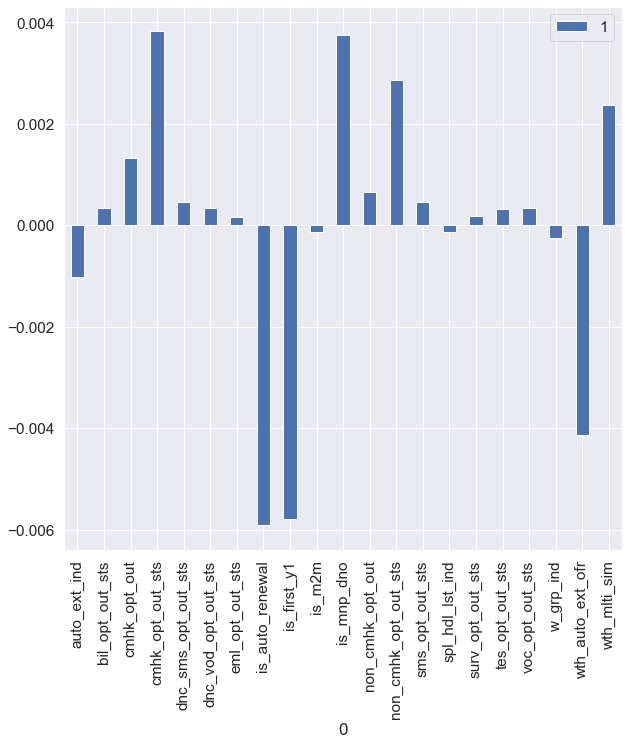

In [66]:
t=N_0_df/N_0_Tot-Y_0_df/Y_0_Tot
# t=N_0_df/len(test[test['是否离网']=='N'])-Y_0_df/len(test[test['是否离网']=='Y'])
plt.rcParams["figure.figsize"] = [10, 10]
(t[t[1]!=0]).plot.bar()

In [67]:
df_col=t[t[1]!=0].sort_values(by=1).index.tolist()
df_col

['is_auto_renewal',
 'is_first_y1',
 'wth_auto_ext_ofr',
 'auto_ext_ind',
 'w_grp_ind',
 'is_m2m',
 'spl_hdl_lst_ind',
 'eml_opt_out_sts',
 'surv_opt_out_sts',
 'tes_opt_out_sts',
 'bil_opt_out_sts',
 'dnc_vod_opt_out_sts',
 'voc_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'non_cmhk_opt_out',
 'cmhk_opt_out',
 'wth_mlti_sim',
 'non_cmhk_opt_out_sts',
 'is_mnp_dno',
 'cmhk_opt_out_sts']

In [68]:
# pd.DataFrame(df_col).to_csv('YN.csv', encoding='utf-8-sig', index=False)

In [69]:
_0_count_test=[]
# tt=test.drop(['离网日期'],axis=1)
tt=test
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [70]:
_0_count_train=[]
# tt=f.drop(['离网日期'],axis=1)
tt=f
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_train.append(temp)

In [71]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [72]:
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_train=b.to_frame('是否离网')

----------------------------------模型 Set up------------------------------------------

In [73]:
clf = svm.SVC(kernel='linear')

In [74]:
clf.fit(np.array(_0_count_train[:]), y_train.iloc[:]['是否离网'].to_numpy())

In [ ]:
y_pred = clf.predict(np.array(_0_count_train[80000:]))
val=y_pred-y_train.iloc[80000:]['是否离网'].to_numpy()
(len(y_train.iloc[80000:]['是否离网'])-len(np.nonzero(val)[0]))/len(y_train.iloc[80000:]['是否离网'])*100

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

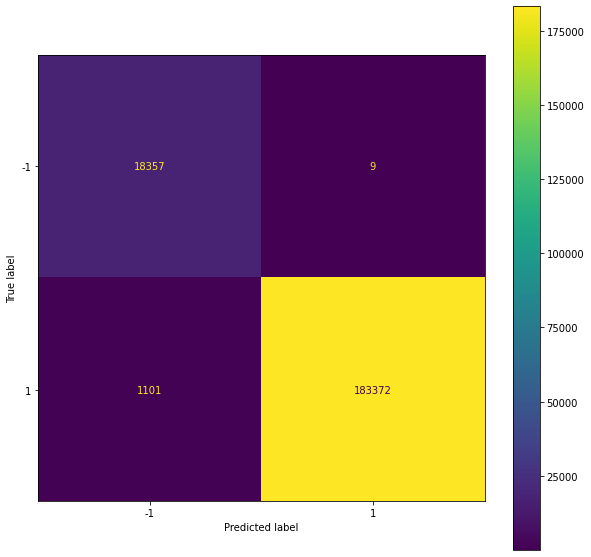

In [ ]:
cm = confusion_matrix(y_train.iloc[80000:]['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

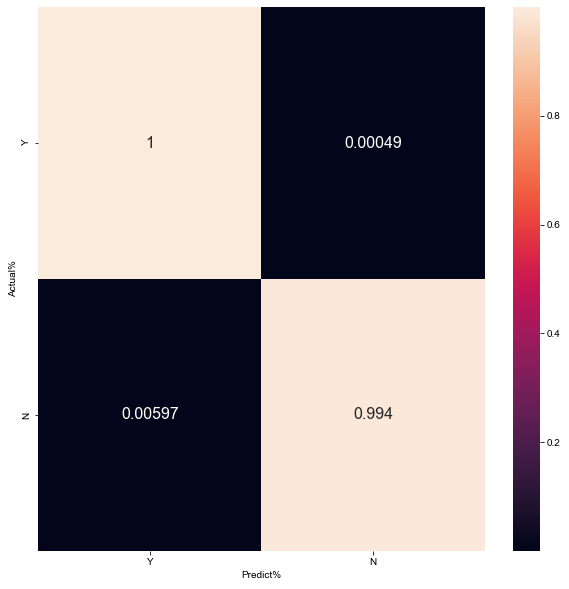

In [ ]:
conf_list=cm.tolist()
conf_prec=[conf_list[0][0]/sum(conf_list[0]),conf_list[0][1]/sum(conf_list[0]),conf_list[1][0]/sum(conf_list[1]),conf_list[1][1]/sum(conf_list[1])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size

In [ ]:
y_pred = clf.predict(np.array(_0_count_test))
val=y_pred-y_test['是否离网'].to_numpy()
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

99.89955534867768

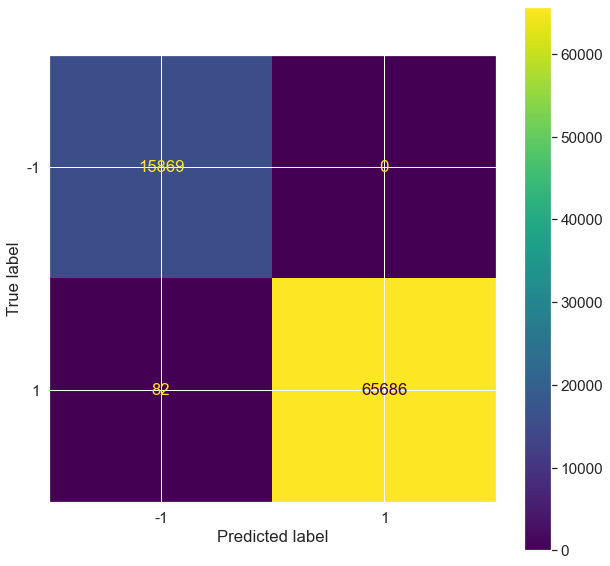

In [ ]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

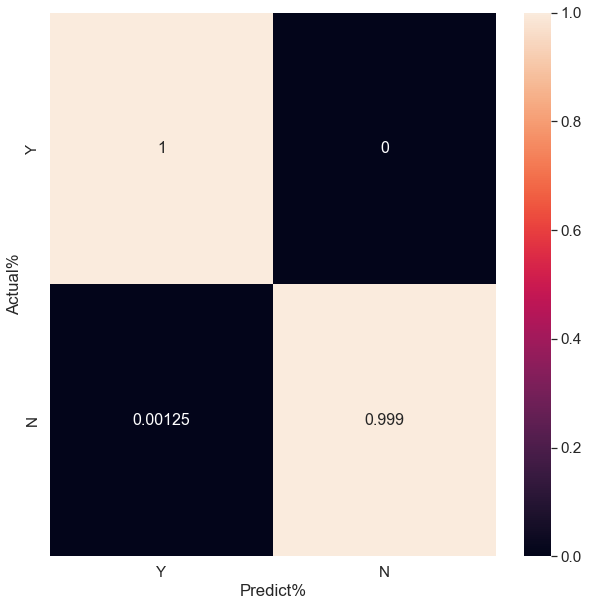

In [ ]:
conf_list=cm.tolist()
conf_prec=[conf_list[0][0]/sum(conf_list[0]),conf_list[0][1]/sum(conf_list[0]),conf_list[1][0]/sum(conf_list[1]),conf_list[1][1]/sum(conf_list[1])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size

In [ ]:
y_pred = clf.predict(np.array(_0_count_train[80000:]))
val=y_pred-y_train.iloc[80000:]['是否离网'].to_numpy()
len(np.nonzero(val)[0])

1110

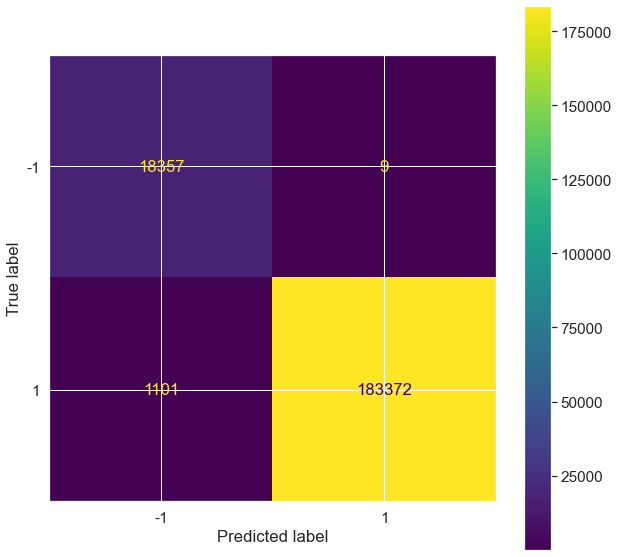

In [ ]:
cm = confusion_matrix(y_train.iloc[80000:]['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred = clf.predict(np.array(_0_count_test))
val=y_pred-y_test['是否离网'].to_numpy()
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

99.89955534867768

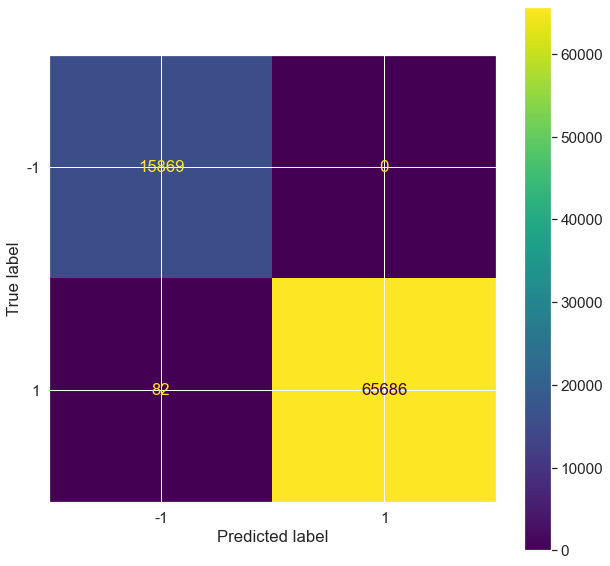

In [ ]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
clf.coef_[0]

array([-2.75335310e-13, -2.75335310e-13,  2.32035855e-04, -1.93058187e-04,
        1.57466968e-04,  1.95907395e-05, -4.29514487e-05, -1.56700949e-04,
       -8.36711263e-05, -9.13807257e-05, -6.04235072e-05,  1.09558870e-03,
        1.99981319e+00,  9.99784371e-01,  9.99784371e-01,  1.99997066e+00,
        4.59658460e-05,  4.59658460e-05,  4.10200283e-04, -2.16305807e-04,
        1.99991900e+00])

In [ ]:
(pd.DataFrame(df_col,columns=['Features']).join(pd.DataFrame(clf.coef_[0],columns=['svmvalue']))).to_csv('featuresvmvalue.csv', encoding='utf-8-sig',index=False)

In [ ]:
len(clf.coef_[0])

21